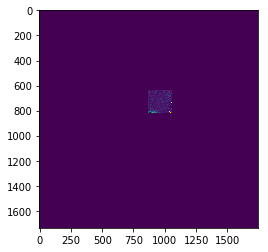

In [60]:
import numpy as np
import cfelpyutils.crystfel_utils as c
import cfelpyutils.geometry_utils as g
import h5py
import numpy as np
import matplotlib.pyplot as plt

class Detector:
    """" A reprezentation detector
        min_fs - min index in columns
        min_ss - min index in rows
        max_fs - max index in columns
        max_ss - max index in rows
        corner_x/corner_y - reprezentation position in Canvas
        
    
    """
    def __init__(self,name,min_fs,min_ss,max_fs,max_ss,xfs,yfs,xss,yss\
                 ,corner_x,corner_y,data):
        self.name = name
        self.min_fs = min_fs
        self.min_ss = min_ss
        self.max_fs = max_fs
        self.max_ss = max_ss
        self.xfs = xfs
        self.yfs = yfs
        self.xss = xss
        self.yss = yss
        self.corner_x = corner_x
        self.corner_y = corner_y
        self.array = np.copy(data[self.min_ss : self.max_ss , self.min_fs : self.max_fs])
        #self.array = np.copy(matrix)
        
    def get_min_fs(self):
        return self.min_fs
    def get_min_ss(self):
        return self.min_ss
    def get_max_fs(self):
        return self.max_fs
    def get_max_ss(self):
        return self.max_ss
    def get_xfs(self):
        return self.xfs
    def get_yfs(self):
        return self.yfs
    def get_xss(self):
        return self.xss
    def get_yss(self):
        return self.yss
    def corner_x(self):
        return self.corner_x
    def corner_y(self):
        return self.corner_y
    
    def set_min_fs(self,min_fs):
        self.min_fs = min_fs
    def set_min_ss(self,min_ss):
        self.min_ss = min_ss
    def set_max_fs(self,max_fs):
        self.max_fs = max_fs
    def set_max_ss(self,max_ss):
        self.max_ss = max_ss
    def set_xfs(self,xfs):
        self.xfs = xfs
    def set_yfs(self,yfs):
        self.yfs = yfs
    def set_xss(self,xss):   
        self.xss = xss
    def set_yss(self,yss):
        self.yss = yss
    def set_corner_x(self,corner_x):
        self.corner_x = corner_x
    def set_corner_y(self,corner_y):
        self.corner_y = corner_y
    def Printer(self):
        print(self.name,self.array)
              #self.min_fs,self.min_ss,self.max_fs,self.max_ss)
    def set_array(self,matrix):
        self.array = matrix[self.min_ss : self.max_ss , self.min_fs : self.max_fs]
    def get_array(self):
        return self.array
    
# parsefile to ditc the geom file global
geom = c.load_crystfel_geometry("/home/tsachanowski/CrystFELL_tutorial/5HT2B-Liu-2013.geom")


# tworzy dict do plikow chirarcha drzewa
def katalog(slownik):
    for x in slownik.keys():
        if type(slownik[x]) ==  h5py._hl.group.Group: #czyli dana nazwa jest grupa
            slownik[x] = {z : slownik[x][z]  for z in  slownik[x] }
            #  slownik pod danym kluczem 
            #ma katalog to z tego robie  slownik ktory ajko klucz ma nazwe rzeczy w tym katalogu 
            #a wartsoc to jest referencja do tego pliku/katalogu
            katalog(slownik[x])
    return slownik

#pobiera dane ze slownika
def dane_obrazu (slownik):
    for x in slownik.keys():
        if x == "data":
            if type(slownik[x]) == h5py._hl.dataset.Dataset:
                return slownik[x]
            else:
                return dane_obrazu(slownik[x])
    return None 
def table(file):
    
        with  h5py.File(file,"r") as f:
            diction = {x:f[x] for x in f}
            diction2 = katalog(diction)  
            data1 = dane_obrazu(diction2)
            Detectors = Data_Detectors(geom,data1)
            #for x in Detectors:
            #    Detectors[x].Printer()
            Obraz = np.zeros((1736,1742))
            Obraz[871-236:871+184-236,868:868+193]=Detectors['q0a2'].get_array()
            plt.imshow(np.uint8(Obraz),)
            plt.show()

def Data_Detectors(geom,data1):    
    Detectors = {x:Detector(name=x, corner_x=geom["panels"][x]["cnx"],\
    corner_y=geom["panels"][x]["cny"],min_fs = geom["panels"][x]["min_fs"],\
    min_ss = geom["panels"][x]["min_ss"],max_fs =geom["panels"][x]["max_fs"],\
    max_ss = geom["panels"][x]["max_ss"],xfs = geom["panels"][x]["xfs"],\
    yfs = geom["panels"][x]["yfs"], xss = geom["panels"][x]["xss"],\
    yss = geom["panels"][x]["max_fs"],data = data1) for x in geom["panels"] }
    
    return Detectors #dict witch all detectors value

       
table("Plik3.h5")

In [32]:
import cfelpyutils.crystfel_utils as c
import cfelpyutils.geometry_utils as g
geom = c.load_crystfel_geometry("/home/tsachanowski/CrystFELL_tutorial/5HT2B-Liu-2013.geom")
print(g.compute_min_array_size(g.compute_pix_maps(geom)))


(1736, 1742)


In [44]:
import numpy as np
x = np.array([[1,1,1,2],[2,2,2,2],[9,9,6,1]])
print(x)
print()
x= x[::-1,]
print(x)
print()
print(np.rot90(x,-1))

[[1 1 1 2]
 [2 2 2 2]
 [9 9 6 1]]

[[9 9 6 1]
 [2 2 2 2]
 [1 1 1 2]]

[[1 2 9]
 [1 2 9]
 [1 2 6]
 [2 2 1]]
